In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [4]:
df = pd.read_csv('creditcard.csv')

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.isnull().sum().max()

np.int64(0)

In [7]:
print(f"fraud: {round(df['Class'].value_counts()[0]/len(df) * 100,2)}% of the dataset")
print(f"not fraud: {round(df['Class'].value_counts()[1]/len(df) * 100,2)}% of the dataset")

fraud: 99.83% of the dataset
not fraud: 0.17% of the dataset


In [8]:
def graph_distributions(df):
    colors = ["#0101DF", "#DF0101"]
    sns.countplot(x='Class', data=df, palette=colors, hue='Class', legend=False)
    plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
    plt.show()

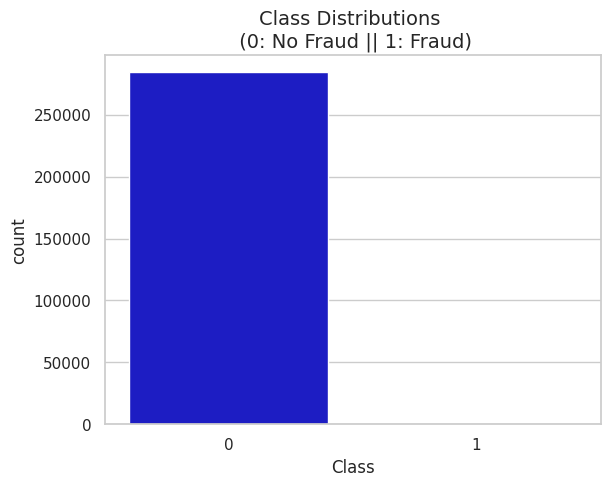

In [9]:
graph_distributions(df)

In [10]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [11]:
def plot_kdeplot(data, color, title, xlabel, ylabel):
    ax = sns.kdeplot(data, fill=True, color=color)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel) 
    plt.tight_layout()
    plt.show() 

In [12]:
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1, 1))

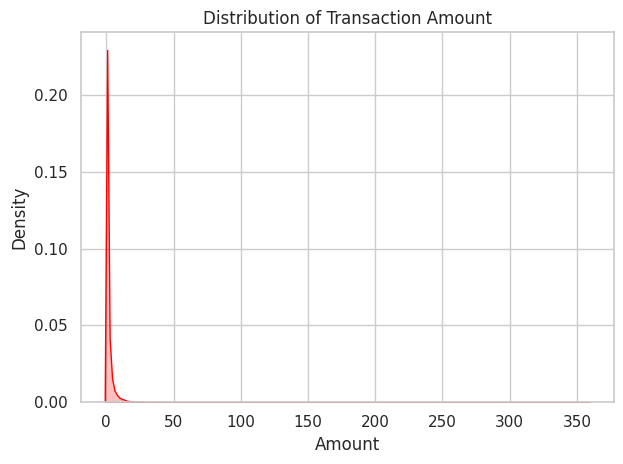

In [13]:
plot_kdeplot(df['scaled_amount'], 'red', 'Distribution of Transaction Amount', 'Amount', 'Density')

In [14]:
df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [15]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [16]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold

print(f"no fraud: {round(df['Class'].value_counts()[0]/len(df) * 100,2)}% of the dataset")
print(f"fraud: {round(df['Class'].value_counts()[1]/len(df) * 100,2)}% of the dataset")

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits = 5, random_state=None, shuffle=False)

no fraud: 99.83% of the dataset
fraud: 0.17% of the dataset


In [18]:
for train_index, test_index in sss.split(X, y):
    print(f"Train: {train_index}, Test: {test_index}")
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, originalytest = y.iloc[train_index], y.iloc[test_index]

train_unique_label, train_counts_label = np.unique(ar=original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(ar=originalytest, return_counts=True)

print('-' * 100)

Train: [ 30473  30496  31002 ... 284804 284805 284806], Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806], Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806], Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806], Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868], Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------


In [19]:
df = df.sample(frac=1)

fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
95965,-0.297073,-0.224956,-0.302689,1.218788,-0.010161,0.648847,0.737521,-0.165830,0.826602,-0.037965,...,0.017685,0.159552,0.812119,0.021985,-0.297976,-0.815898,-0.460783,-0.268178,-0.300607,0
176049,29.398030,0.445447,-2.003460,-7.159042,-4.050976,1.309580,-2.058102,-0.098621,2.880083,-0.727484,...,3.973217,1.244287,-1.015232,-1.800985,0.657586,-0.435617,-0.894509,-0.397557,0.314262,1
178734,-0.258646,0.458922,1.950047,-0.118470,-0.838379,0.383980,-0.160154,-0.135987,-0.605564,0.168983,...,-0.128075,-0.230846,-0.589743,0.433252,0.583193,-0.638099,0.109967,-0.014517,-0.016545,0
143188,-0.279466,0.005745,-3.003459,2.096150,-0.487030,3.069453,-1.774329,0.251804,-4.328776,-2.425478,...,0.692537,0.163967,1.245648,-0.269241,0.537102,-0.220757,-0.059555,0.460710,-0.033551,1
154718,-0.307413,0.211198,-5.603690,5.222193,-7.516830,8.117724,-2.756858,-1.574565,-6.330343,2.998419,...,0.227526,1.242896,0.428408,-0.101184,-0.520199,-0.176938,0.461450,-0.106625,-0.479662,1


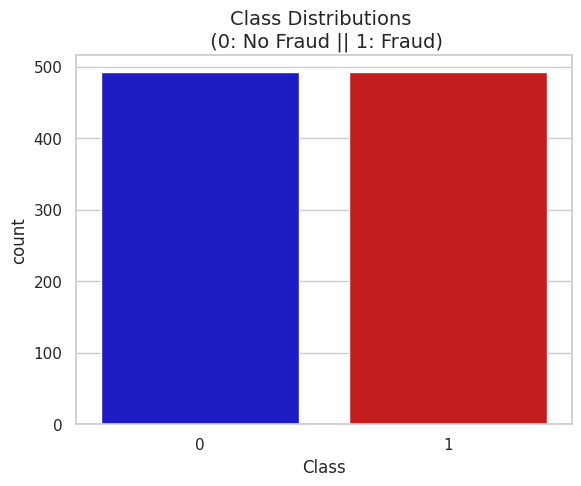

In [20]:
graph_distributions(new_df)

In [21]:
print(new_df['Class'].value_counts()/len(new_df))

Class
0    0.5
1    0.5
Name: count, dtype: float64


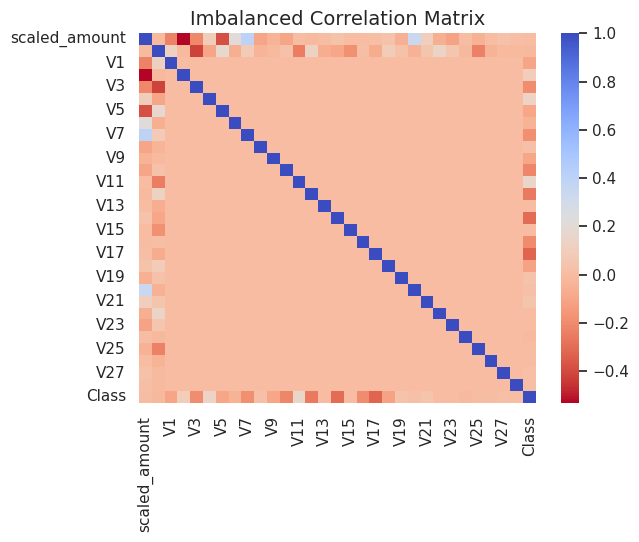

In [22]:
corr = df.corr()
ax = sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})
ax.set_title('Imbalanced Correlation Matrix', fontsize=14)
plt.show()

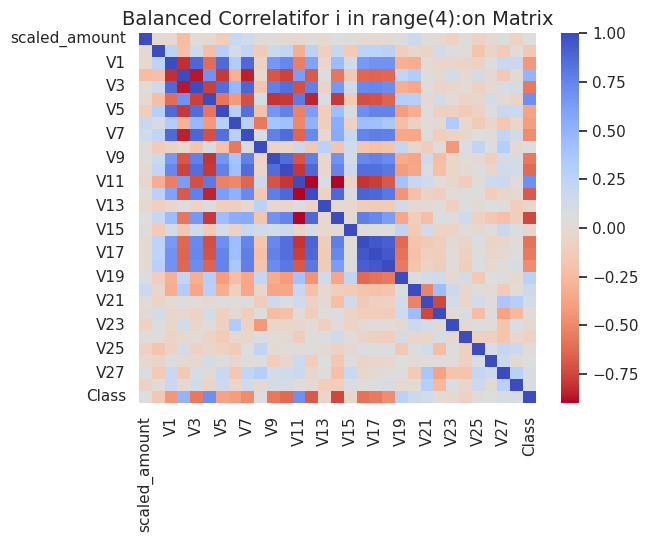

In [23]:
corr_balanced = new_df.corr()
ax = sns.heatmap(corr_balanced, cmap='coolwarm_r', annot_kws={'size':20})
ax.set_title('Balanced Correlatifor i in range(4):on Matrix', fontsize=14)
plt.show()

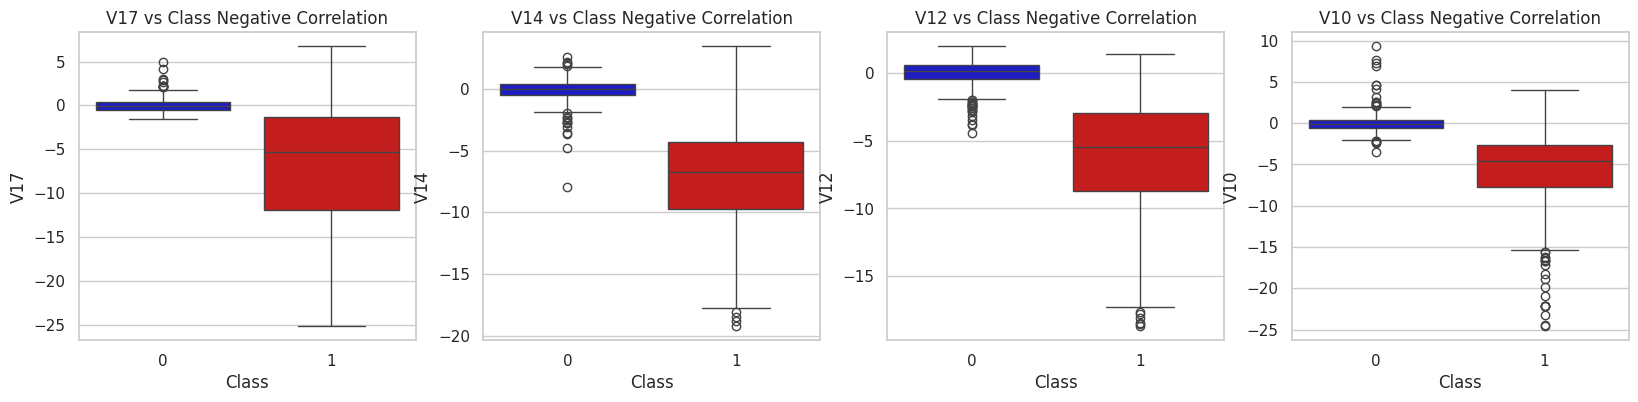

In [24]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

colors = ["#0101DF", "#DF0101"]

sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0], hue="Class", legend=False)
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1], hue="Class", legend=False)
axes[1].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2], hue="Class", legend=False)
axes[2].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3], hue="Class", legend=False)
axes[3].set_title('V10 vs Class Negative Correlation')


plt.show()

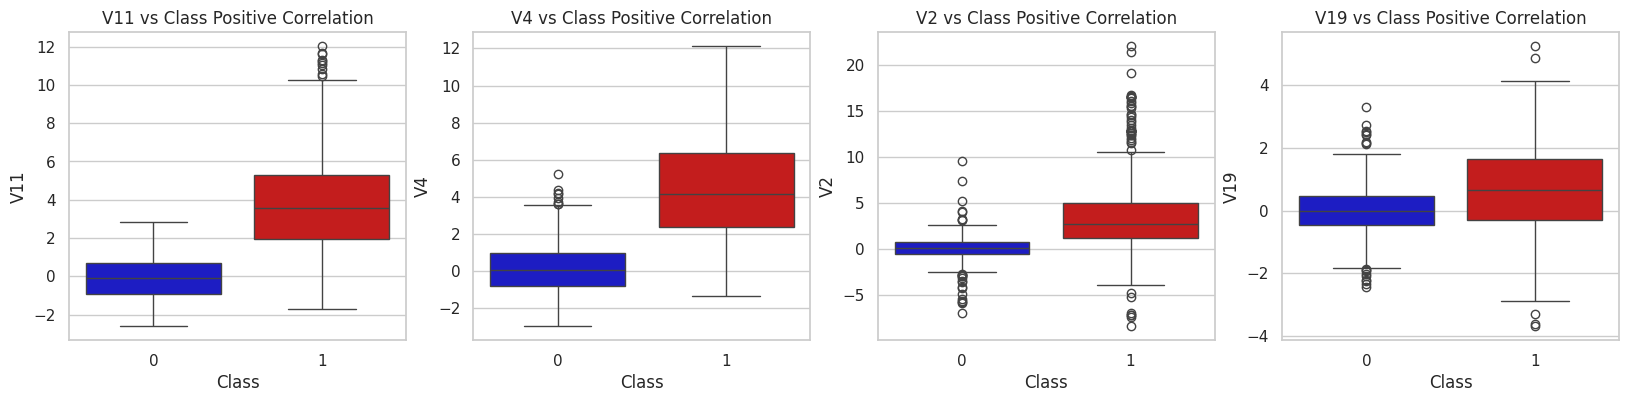

In [25]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0], hue="Class", legend=False)
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1], hue="Class", legend=False)
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2], hue="Class", legend=False)
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3], hue="Class", legend=False)
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

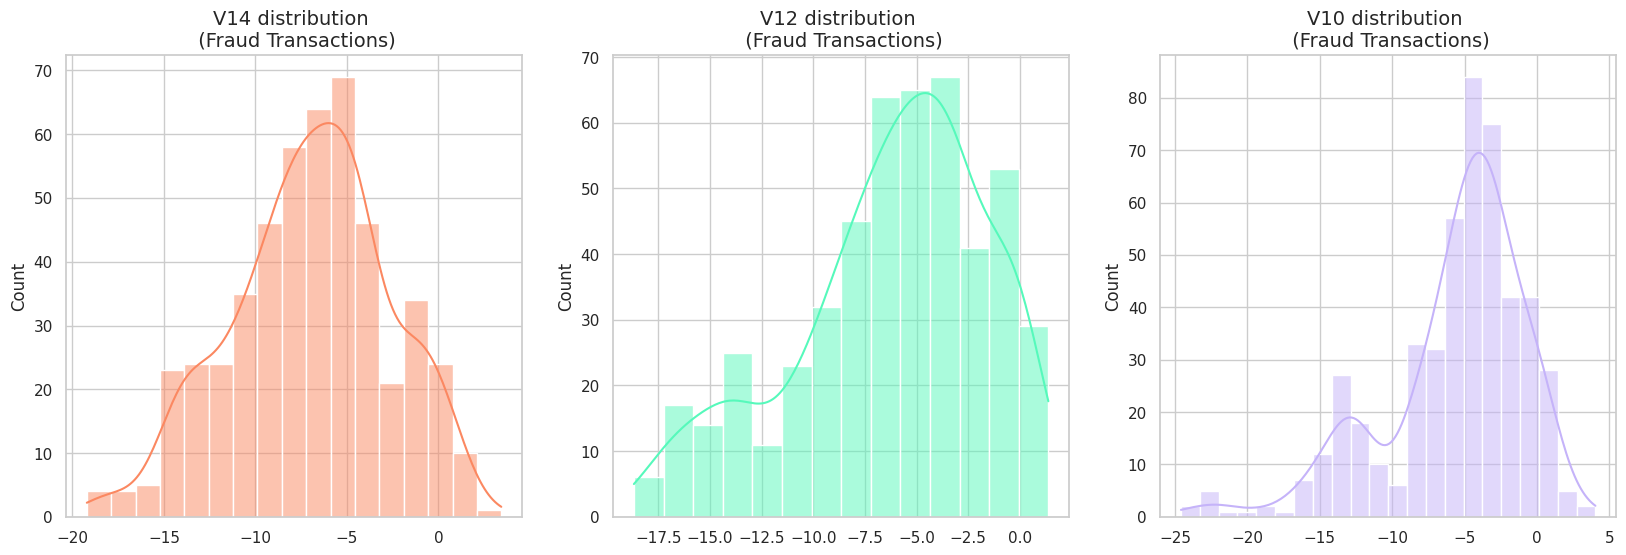

In [26]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.histplot(v14_fraud_dist, ax=ax1, color="#FB8861", kde=True)
ax1.set_title("V14 distribution \n (Fraud Transactions)", fontsize=14)

v12_fraud_dist = new_df["V12"].loc[new_df['Class'] == 1].values
sns.histplot(data=v12_fraud_dist, ax=ax2, color="#56F9BB", kde=True)
ax2.set_title("V12 distribution \n (Fraud Transactions)", fontsize=14)

v10_fraud_dist = new_df["V10"].loc[new_df['Class'] == 1].values
sns.histplot(data=v10_fraud_dist, ax=ax3, color="#C5B3F9", kde=True)
ax3.set_title("V10 distribution \n (Fraud Transactions)", fontsize=14)

plt.show()

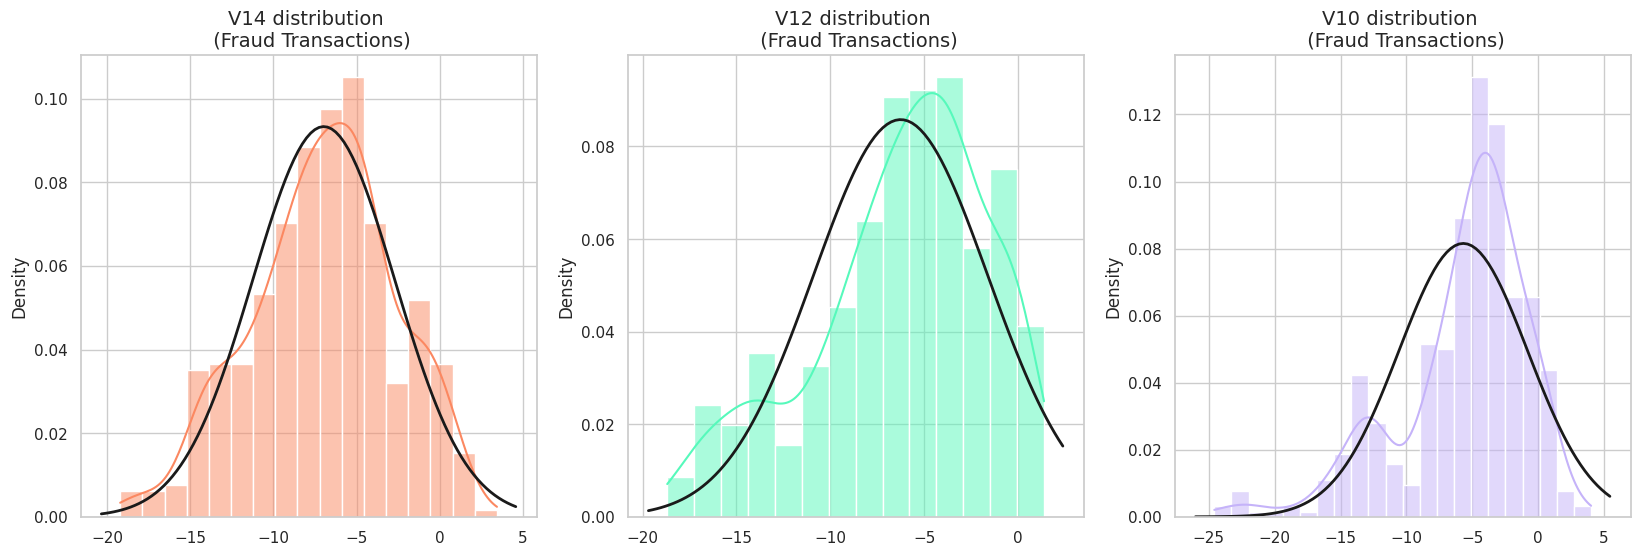

In [27]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.histplot(v14_fraud_dist, ax=ax1, color="#FB8861", kde=True, stat='density')
xmin, xmax = ax1.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(v14_fraud_dist), np.std(v14_fraud_dist))
ax1.plot(x, p, 'k', linewidth=2)
ax1.set_title("V14 distribution \n (Fraud Transactions)", fontsize=14)

v12_fraud_dist = new_df["V12"].loc[new_df['Class'] == 1].values
sns.histplot(v12_fraud_dist, ax=ax2, color="#56F9BB", kde=True, stat='density')
xmin, xmax = ax2.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(v12_fraud_dist), np.std(v12_fraud_dist))
ax2.plot(x, p, 'k', linewidth=2)
ax2.set_title("V12 distribution \n (Fraud Transactions)", fontsize=14)

v10_fraud_dist = new_df["V10"].loc[new_df['Class'] == 1].values
sns.histplot(v10_fraud_dist, ax=ax3, color="#C5B3F9", kde=True, stat='density')
xmin, xmax = ax3.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(v10_fraud_dist), np.std(v10_fraud_dist))
ax3.plot(x, p, 'k', linewidth=2)
ax3.set_title("V10 distribution \n (Fraud Transactions)", fontsize=14)

plt.show()

In [28]:
def cut_off_outliers(data, feature):
    fraud = data[feature].loc[data['Class'] == 1].values
    q25, q75 = np.percentile(fraud, 25), np.percentile(fraud, 75)
    print(f"Quratile 25 {q25} | Quartile 75 {q75}")
    iqr = q75 - q25
    print(f"iqr: {iqr}")

    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    print(f"Cut Off: {cut_off}")
    print(f"{feature} Lower: {lower}")
    print(f"{feature} Upper: {upper}")

    outliers = [x for x in fraud if x < lower or x > upper]
    print(f"Feature {feature} Outliers for Fraud Cases: {len(outliers)}")
    print(f"{feature} outliers: {outliers}")

    return lower, upper

v14_lower, v14_upper = cut_off_outliers(data=new_df, feature='V14')
new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)

Quratile 25 -9.692722964972386 | Quartile 75 -4.282820849486865
iqr: 5.409902115485521
Cut Off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
Feature V14 Outliers for Fraud Cases: 4
V14 outliers: [np.float64(-18.0499976898594), np.float64(-18.8220867423816), np.float64(-18.4937733551053), np.float64(-19.2143254902614)]


In [29]:
v12_lower, v12_upper = cut_off_outliers(data=new_df, feature='V12')
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)

v10_lower, v10_upper = cut_off_outliers(data=new_df, feature='V10')
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)

Quratile 25 -8.67303320439115 | Quartile 75 -2.893030568676315
iqr: 5.780002635714835
Cut Off: 8.670003953572252
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
Feature V12 Outliers for Fraud Cases: 4
V12 outliers: [np.float64(-18.6837146333443), np.float64(-18.4311310279993), np.float64(-18.5536970096458), np.float64(-18.0475965708216)]
Quratile 25 -7.466658535821847 | Quartile 75 -2.5118611381562523
iqr: 4.954797397665595
Cut Off: 7.432196096498393
V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
Feature V10 Outliers for Fraud Cases: 27
V10 outliers: [np.float64(-24.4031849699728), np.float64(-15.1237521803455), np.float64(-15.5637913387301), np.float64(-16.7460441053944), np.float64(-18.2711681738888), np.float64(-16.6011969664137), np.float64(-18.9132433348732), np.float64(-15.1241628144947), np.float64(-15.3460988468775), np.float64(-22.1870885620007), np.float64(-22.1870885620007), np.float64(-17.1415136412892), np.float64(-22.1870885620007), np.float64(-22.187

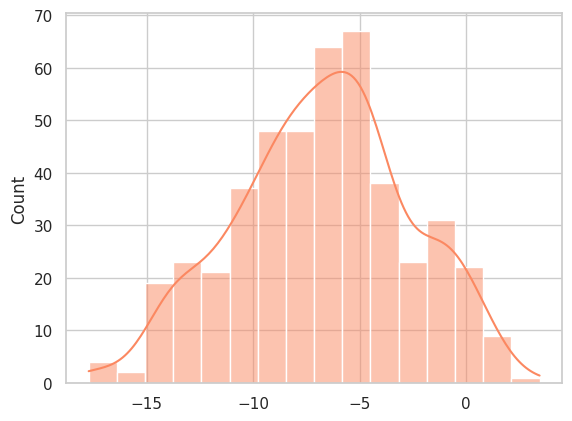

In [30]:
v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.histplot(v14_fraud_dist, color="#FB8861", kde=True)

plt.show()

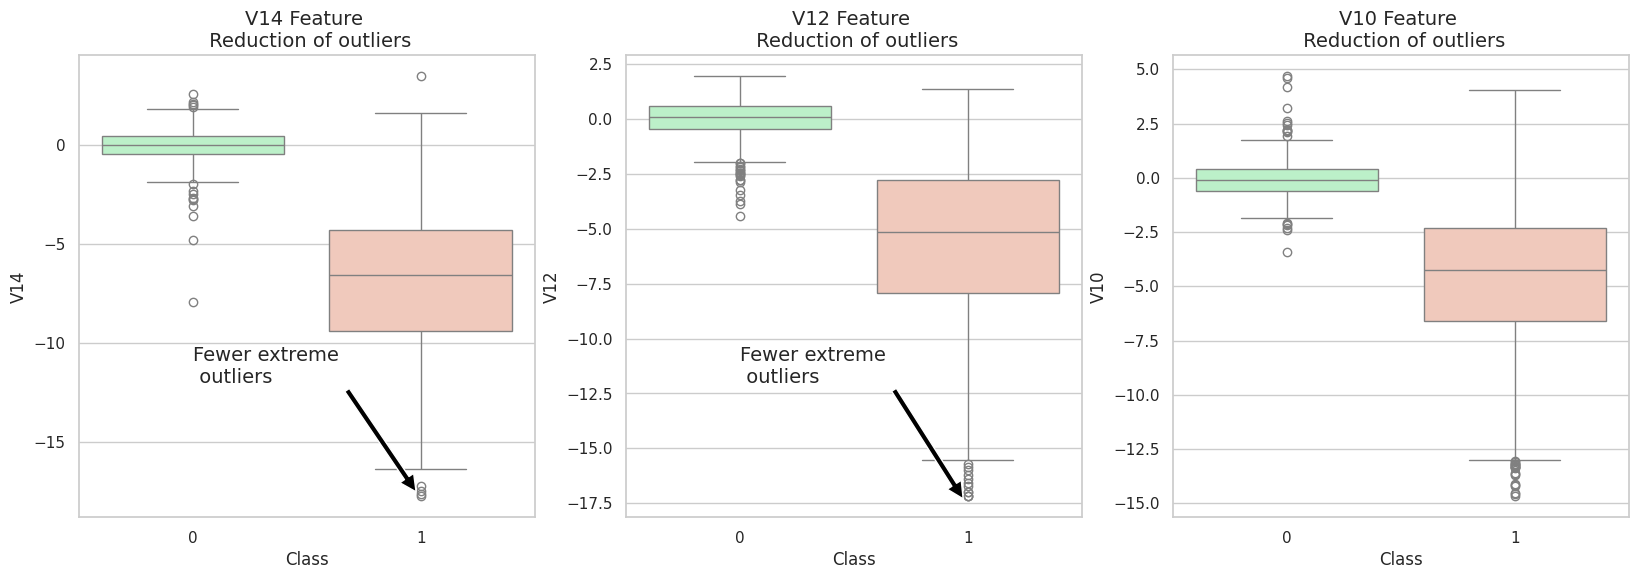

In [31]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors, hue="Class", legend=False)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors, hue="Class", legend=False)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors, hue="Class", legend=False)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

In [32]:
import time

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE, Isomap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

X = new_df.drop('Class', axis=1)
y = new_df['Class']

t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print(f"t-SNE took {t1 - t0} seconds")

t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print(f"PCA took {t1 - t0} seconds")

t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print(f"Truncated SVD took {t1 - t0} seconds")

t-SNE took 5.324137210845947 seconds
PCA took 0.0019164085388183594 seconds
Truncated SVD took 0.0038843154907226562 seconds


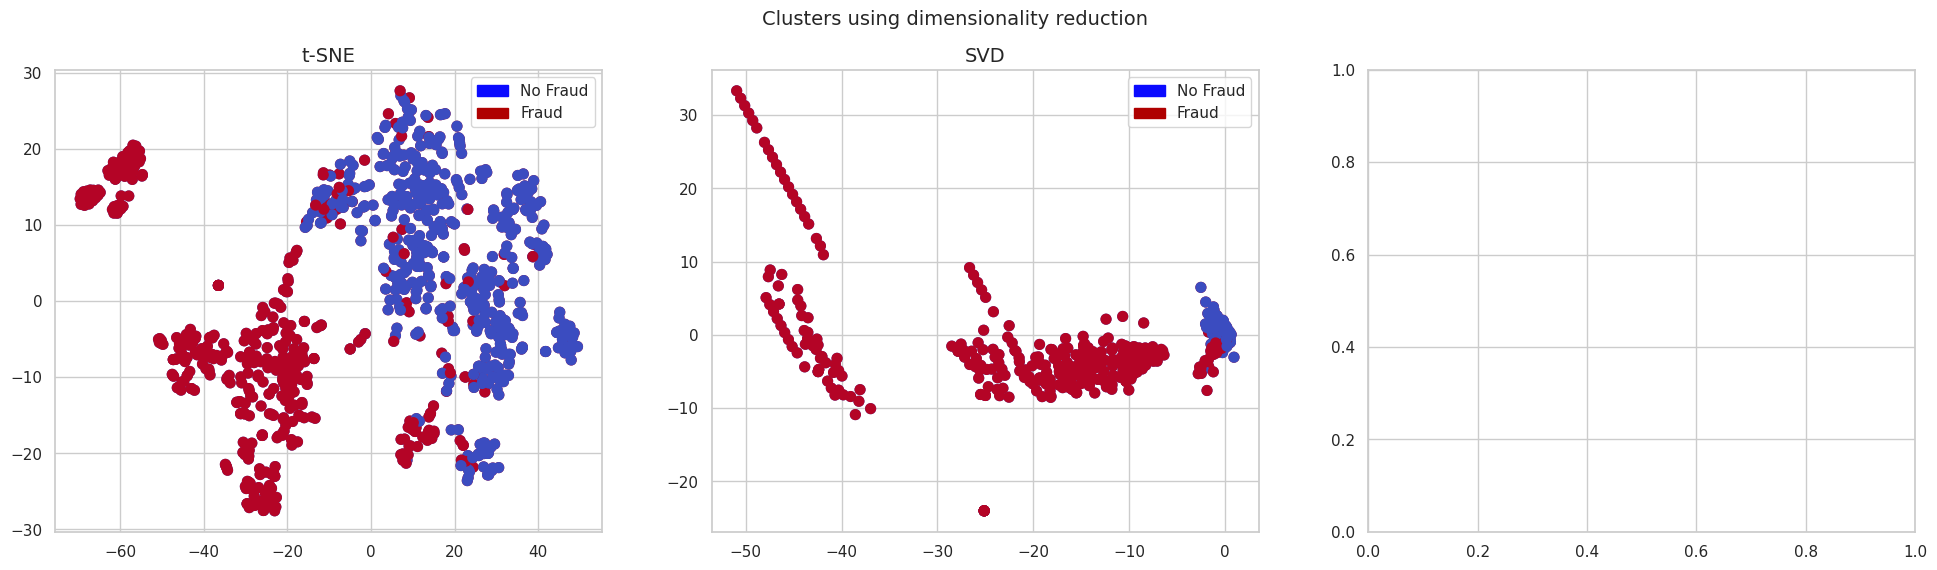

In [35]:
import matplotlib.patches as mpatches


f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))

f.suptitle("Clusters using dimensionality reduction", fontsize=14)

blue_patch = mpatches.Patch(color="#0A0AFF", label="No Fraud")
red_patch = mpatches.Patch(color="#AF0000", label="Fraud")

ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y==0), cmap="coolwarm", label="No Fraud", linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y==1), cmap="coolwarm", label="Fraud", linewidths=2)
ax1.set_title("t-SNE", fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])

ax2.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y==0), cmap="coolwarm", label="No Fraud", linewidths=2)
ax2.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y==1), cmap="coolwarm", label="Fraud", linewidths=2)
ax2.set_title("SVD", fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

plt.show()
